# Backpropagation in Multilayer Neural Networks

### Goals: 
- implementING a real gradient descent in `Numpy`

### Dataset:
- Similar as first Lab - Digits: 10 class handwritten digits
- [sklearn.datasets.load_digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

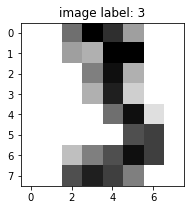

In [5]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- Normalization
- Train / test split

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

In [7]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

In [8]:
one_hot(n_classes=10, y=3)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [9]:
one_hot(n_classes=10, y=[0, 4, 9, 1])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
# norm over a column 
def softmax(X):
    exp = np.exp(X)
    return exp / np.sum(exp, axis=-1, keepdims=True)


print("softmax of a single vector:")
print(softmax([10, 2, -3]))

softmax of a single vector:
[9.99662391e-01 3.35349373e-04 2.25956630e-06]


In [11]:
# TO BE EXAMINED MORE: keepdims?!

m = 3
W = np.ones((m, 2 * m, 3 * m))

for i in range(m):
    for j in range(2 * m):
        for k in range(3 * m):
            W[i, j, k] = k
        
# np.sum(W, axis=0)
print(W)

3 * 6 * 9
np.sum(W, axis=-1, keepdims=True)

# print(W[:, 0])

[[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]]

 [[0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]]

 [[0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]
  [0. 1. 2. 3. 4. 5. 6. 7. 8.]]]


array([[[36.],
        [36.],
        [36.],
        [36.],
        [36.],
        [36.]],

       [[36.],
        [36.],
        [36.],
        [36.],
        [36.],
        [36.]],

       [[36.],
        [36.],
        [36.],
        [36.],
        [36.],
        [36.]]])

Probabilities should sum to 1:

In [12]:
print(np.sum(softmax([10, 2, -3])))

1.0


In [13]:
print("sotfmax of 2 vectors:")
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
print(softmax(X))

sotfmax of 2 vectors:
[[9.99662391e-01 3.35349373e-04 2.25956630e-06]
 [2.47262316e-03 9.97527377e-01 1.38536042e-11]]


The sum of probabilities for each input vector of logits should some to 1:

In [14]:
print(np.sum(softmax(X), axis=1))

[1. 1.]


Implement a function that given the true one-hot encoded class `Y_true` and and some predicted probabilities `Y_pred` returns the negative log likelihood.

In [15]:
# def nll(Y_true, Y_pred):
#     Y_true = np.asarray(Y_true)
#     Y_pred = np.asarray(Y_pred)

#     return -np.sum(Y_true * np.log(Y_pred))


# # Make sure that it works for a simple sample at a time
# print(nll([1, 0, 0], [.99, 0.01, 0]))

Check that the nll of a very confident yet bad prediction is a much higher positive number:

In [16]:
# print(nll([1, 0, 0], [0.01, 0.01, .98]))

Make sure that your implementation can compute the average negative log likelihood of a group of predictions: `Y_pred` and `Y_true` can therefore be past as 2D arrays:

In [17]:
# def nll(Y_true, Y_pred):
#     Y_true = np.atleast_2d(Y_true)
#     Y_pred = np.atleast_2d(Y_pred)

#     # TODO
#     return 0.

In [18]:
# # Check that the average NLL of the following 3 almost perfect
# # predictions is close to 0
# Y_true = np.array([[0, 1, 0],
#                    [1, 0, 0],
#                    [0, 0, 1]])

# Y_pred = np.array([[0,   1,    0],
#                    [.99, 0.01, 0],
#                    [0,   0,    1]])

# print(nll(Y_true, Y_pred))

In [19]:
# # %load solutions/numpy_nll.py
# EPSILON = 1e-8


# def nll(Y_true, Y_pred):
#     Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred)
#     loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
#     return -np.mean(loglikelihoods)


# # Make sure that it works for a simple sample at a time
# print(nll([1, 0, 0], [.99, 0.01, 0]))

# # Check that the nll of a very confident yet bad prediction
# # is very high:
# print(nll([1, 0, 0], [0.01, 0.01, .98]))

# # Check that the average NLL of the following 3 almost perfect
# # predictions is close to 0
# Y_true = np.array([[0, 1, 0],
#                    [1, 0, 0],
#                    [0, 0, 1]])

# Y_pred = np.array([[0,   1,    0],
#                    [.99, 0.01, 0],
#                    [0,   0,    1]])
# print(nll(Y_true, Y_pred))

Let us now study the following linear model trainable by SGD, **one sample at a time**.

In [20]:
# class LogisticRegression():

    
#     def __init__(self, input_size, output_size):
#         self.W = np.random.uniform(size=(input_size, output_size),
#                                    high=0.1, low=-0.1)
#         self.b = np.random.uniform(size=output_size,
#                                    high=0.1, low=-0.1)
        
#         self.output_size = output_size
        
#     def forward(self, X):
#         Z = np.dot(X, self.W) + self.b
#         return softmax(Z)
    
#     # this returns a vector 1500x1:
#     # that is the maximum prob. over axis=1 which is on [0, 1, 2, \dots, 9]
#     # and the axis=0 is say 1500 where we have 1500 images each of these
#     # image was originally 8x8 and then transformed into 1x64
#     def predict(self, X):
#         if len(X.shape) == 1:
#             return np.argmax(self.forward(X))
#         else:
#             return np.argmax(self.forward(X), axis=1)
    
#     def grad_loss(self, x, y_true):
#         y_pred = self.forward(x)
#         dnll_output =  y_pred - one_hot(self.output_size, y_true)
#         grad_W = np.outer(x, dnll_output)
#         grad_b = dnll_output
#         grads = {"W": grad_W, "b": grad_b}
        
#         return grads
    
#     def train(self, x, y, learning_rate):
#         # Traditional SGD update without momentum
#         grads = self.grad_loss(x, y)
#         self.W = self.W - learning_rate * grads["W"]
#         self.b = self.b - learning_rate * grads["b"]      
        
#     def loss(self, X, y):
#         return nll(one_hot(self.output_size, y), self.forward(X))

#     def accuracy(self, X, y):
#         y_preds = np.argmax(self.forward(X), axis=1)
#         return np.mean(y_preds == y)

formula (15) is from https://www.kamperh.com/notes/kamper_backprop17.pdf

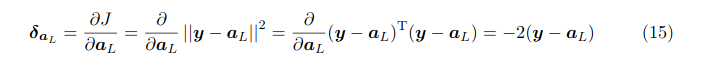

In [21]:
# # Build a model and test its forward inference
# n_features = X_train.shape[1]
# n_classes  = len(np.unique(y_train))
# lr         = LogisticRegression(n_features, n_classes)

# print("Evaluation of the untrained model:")
# train_loss = lr.loss(X_train, y_train)
# train_acc  = lr.accuracy(X_train, y_train)
# test_acc   = lr.accuracy(X_test, y_test)

# print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
#       % (train_loss, train_acc, test_acc))

Evaluate the randomly initialized model on the first example:

In [22]:
# def plot_prediction(model, sample_idx=0, classes=range(10)):
#     fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#     ax0.imshow(scaler.inverse_transform(X_test[sample_idx]).reshape(8, 8), cmap=plt.cm.gray_r,
#                interpolation='nearest')
#     ax0.set_title("True image label: %d" % y_test[sample_idx]);


#     ax1.bar(classes, one_hot(len(classes), y_test[sample_idx]), label='true')
#     ax1.bar(classes, model.forward(X_test[sample_idx]), label='prediction', color="red")
#     ax1.set_xticks(classes)
#     prediction = model.predict(X_test[sample_idx])
#     ax1.set_title('Output probabilities (prediction: %d)'
#                   % prediction)
#     ax1.set_xlabel('Digit class')
#     ax1.legend()
    
# plot_prediction(lr, sample_idx=0)

In [23]:
# # Training for one epoch
# learning_rate = 0.01

# for i, (x, y) in enumerate(zip(X_train, y_train)):
#     lr.train(x, y, learning_rate)
#     if i % 100 == 0:
#         train_loss = lr.loss(X_train, y_train)
#         train_acc = lr.accuracy(X_train, y_train)
#         test_acc = lr.accuracy(X_test, y_test)
#         print("Update #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
#               % (i, train_loss, train_acc, test_acc))

Evaluate the trained model on the first example:

In [24]:
# plot_prediction(lr, sample_idx=0)

## b) Feedforward Multilayer

The objective of this section is to implement the backpropagation algorithm (SGD with the chain rule) on a single layer neural network using the sigmoid activation function.

- Implement the `sigmoid` and its element-wise derivative `dsigmoid` functions:

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

$$
dsigmoid(x) = sigmoid(x) \cdot (1 - sigmoid(x))
$$

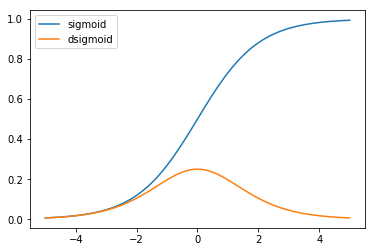

In [25]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))
    

def dsigmoid(X):
    return sigmoid(X) * (1 - sigmoid(X))


x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, dsigmoid(x), label='dsigmoid')
plt.legend(loc='best');

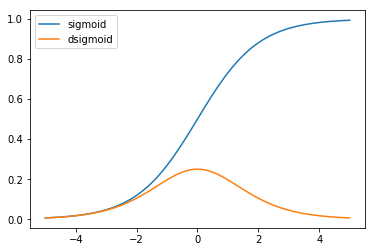

In [26]:
# %load solutions/sigmoid.py
def sigmoid(X):
    return 1 / (1 + np.exp(-X))


def dsigmoid(X):
    sig=sigmoid(X)
    return sig * (1 - sig)


x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, dsigmoid(x), label='dsigmoid')
plt.legend(loc='best');

- Implement `forward` and `forward_keep_all` functions for a model with a hidden layer with a sigmoid activation function:
  - $\mathbf{h} = sigmoid(\mathbf{W}^h \mathbf{x} + \mathbf{b^h})$
  - $\mathbf{y} = softmax(\mathbf{W}^o \mathbf{h} + \mathbf{b^o})$

- Notes: 
  - try to keep the code as similar as possible as the previous one;
  - `forward` now has a keep activations parameter to also return hidden activations and pre activations;

- Update the grad function to compute all gradients; check that the gradients are well defined;

- Implement the `train` and `loss` functions.

**Bonus**: reimplementing all from scratch only using the lecture slides but without looking at the solution of the `LogisticRegression` is an excellent exercise.

In [27]:
EPSILON = 1e-8


class NeuralNet():
    """MLP with 1 hidden layer with a sigmoid activation"""
    
    def __init__(self, input_size, hidden_size, output_size):
        # TODO
        self.W_h = None
        self.b_h = None
        self.W_o = None
        self.b_o = None
        self.output_size = output_size
            
    def forward_keep_activations(self, X):
        # TODO
        z_h = W_o * h + b
        h = softmax(z_h)
        y = np.zeros(size=self.output_size)
        return y, h, z_h

    def forward(self, X):
        y, h, z_h = self.forward_keep_activations(X)
        return y
    
    def loss(self, X, y):
        # TODO
        return 42.

    def grad_loss(self, x, y_true):
        # TODO
        return {"W_h": 0., "b_h": 0., "W_o": 0., "b_o": 0.}

    def train(self, x, y, learning_rate):
        # TODO
        pass

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)

In [28]:
# %load solutions/neural_net.py

In [29]:
# # %load solutions/neural_net.py
class NeuralNet():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size):
        self.W_h = np.random.uniform(
            size=(input_size, hidden_size), high=0.01, low=-0.01)
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(
            size=(hidden_size, output_size), high=0.01, low=-0.01)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size

    def forward(self, X, keep_activations=False):
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        if keep_activations:
            return y, h, z_h
        else:
            return y

    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))

    
    def grad_loss(self, x, y_true):
        y, h, z_h = self.forward(x, keep_activations=True)
        grad_z_o = y - one_hot(self.output_size, y_true)

        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        
        grad_h = np.dot(grad_z_o, np.transpose(self.W_o))
        grad_z_h = grad_h * dsigmoid(z_h)
        
        grad_W_h = np.outer(x, grad_z_h)
        grad_b_h = grad_z_h
        
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # Traditional SGD update on one sample at a time
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)


In [30]:
# fn_softmax(np.ones(10)) * fn_softmax(np.ones(10))

In [31]:
for i in reversed(range(10)):
    print(i)

9
8
7
6
5
4
3
2
1
0


In [78]:
# TODO: DEFINE DIFFERENT FUNCTIONS AND THEIR DERIVS.        
act_fn = lambda u: 1 / (1 + np.exp(-u))
derivative_act_fn = lambda u: act_fn(u) * (1 - act_fn(u))
fn_softmax = lambda u: np.exp(u) / sum(np.exp(u))
derivative_fn_softmax = lambda u: fn_softmax(u) * (1 - fn_softmax(u))


class NeuralNetMultiLayer():
    """MLP"""
    
    def __init__(self, layers_specs, dim_input=None):
        """
        network: is a list of layers
        """
        dim_prev_layer = dim_input
        self.network = []
        for index, layer_spec in enumerate(layers_specs):
            number_of_neurons, act_fn = layer_spec
            self.network.append(self.layer(layer_spec, dim_prev_layer, index=index))
            dim_prev_layer = number_of_neurons
       
        self.output_size, _ = layers_specs[-1]
        
    def layer(self, spec, dim_input=None, index=0, init_distribution=(-0.01, 0.01)):
        """
        sig, th, relu, 
        """
        
        number_of_neurons, act_fn = spec
        low, high = init_distribution
        
        print("layer index:", index)
        print("spec :", spec)
        print("W dim:", number_of_neurons, dim_input)
        
        W = np.random.uniform(low=low, high=high, size=(number_of_neurons, dim_input)) # W*x

        # this is very important; 
        # size specifies only one dimension 
        # so numpy creates a vector; 
        # e.g. (3, 1) is still treated as a matrix and affects MUL
        # but (3, ) is a vector!
        # so the following is wrong
        # bias = np.random.uniform(low=low, high=high, size=(number_of_neurons, 1))
        # but this is correct:
        bias = np.random.uniform(low=low, high=high, size=(number_of_neurons, ))
        return (W, bias, act_fn)
    
    def forward(self, x_input, init_distribution=(-0.01, 0.01)):
        
        """additionally we store intermediate 
        computations over each layer in the list
        `output_over_layer`;
        we need the results to calculate 
        gradient of individual layers
        in a back-propagation (below)
        """
        
        low, high = init_distribution
        
        lst_x = []
        lst_z = []
        lst_y = []
        
        
        x = x_input 
        for index, layer in enumerate(self.network):
            lst_x.append(x)
            (W, bias, act_fn) = layer
#             print("index     :", index)
#             print("W.shape   :", W.shape)
#             print("tmp.shape :", tmp.shape)
#             print("prod.shape:", np.dot(W, tmp).shape)
#             print("bias.shape:", bias.shape)
#             print("act. fnct :", act_fn)
            
            z = np.dot(W, x) + bias
            lst_z.append(z)
            y = act_fn(z)
            lst_y.append(y)
            x = y
        
        return lst_x, lst_z, lst_y
    
    
    # TODO: check the rate init. value!
    def backpropagate(self, x, y_target, eta=0.01): 
     
        lst_x, lst_z, lst_y = self.forward(x) 
        # get the last elements
        x = lst_x[-1]
        z = lst_z[-1]
        y = lst_y[-1]
        
        
        #-----------------------------------------------------
        # list of deltas
        #-----------------------------------------------------
        lst_delta = []
        #-----------------------------------------------------
        
        
        #-----------------------------------------------------
        # J stands for value of the optimization function
        # Energy, Loss, Error;
        J = np.sum((y - y_target) ** 2)
        derivative_J = 2 * (y - y_target) # this is delta(loss) / delta(a_last) 
        
        # importantly: here * is the component-wise vector multiplication 
        # it is not dot-product
        
        delta = derivative_J * derivative_fn_softmax(z) 
        lst_delta.append(delta)
        
        nabla_JW = np.outer(delta, x)
        nabla_Jb = delta
        
            
        #-----------------------------------------------------
        # to update the last layer
        #-----------------------------------------------------
        layer = self.network[-1]
        (W, bias, act_fn) = layer
        W = W - eta * nabla_JW
        bias = bias - eta * nabla_Jb
        self.network[-1] = (W, bias, act_fn)
        #-----------------------------------------------------
        
    
#         print("* shapes W:", W.shape)
#         print("* shapes delta_z:", delta_z.shape)
#         print("* shapes y_prev:", y_prev.shape)
#         print("* shapes W:", W.shape)
#         print("* shapes delta_z:", delta_z.shape)
#         print("* shapes y_prev:", y_prev.shape)
            
    
        # in the following loop we do a backprop and *prepend* deltas 
        # index is going in the reverse way: 
        for ind in reversed(range(len(self.network) - 1)): 
#             print("index:", ind)
            x = lst_x[ind]
            z = lst_z[ind]
            y = lst_y[ind]
        
#             if ind > 0: 
#                 y_prev = lst_y[ind - 1]
#             else: 
#                 y_prev = x
                
            #-----------------------------------------------------
            layer = self.network[ind]
            (W, bias, act_fn) = layer
            
            layer_next = self.network[ind + 1] 
            (W_next, bias_next, act_fn_next) = layer_next
            #-----------------------------------------------------
      
            # vector_one := derivative_sigma^{nu}(z^{nu}) 
            # vector_two := (transpose(W^{nu + 1}) * delta^{nu + 1})
            # delta^{nu} := component_multiplication(vector_one, vector_two)

            # b/c we prepend delta to the list lst_delta and loop-backward
            delta_next = lst_delta[0]
            
            # here * is not a dot-product
            delta = derivative_act_fn(z) * np.dot(np.transpose(W_next), delta_next) 
            #prepend delta to the list
            lst_delta = [delta] + lst_delta

            nabla_JW = np.outer(delta, x)
            nabla_Jb = delta
            
            W = W - eta * nabla_JW
            bias = bias - eta * nabla_Jb
            self.network[ind] = (W, bias, act_fn)
            
            
#             print("** shapes W:", W.shape)
#             print("** shapes delta_next_z:", delta_z_next.shape)
#             print("** shapes y_prev:", y_prev.shape)
#             print("** shapes delta_z:", delta_z.shape
#             print("B: shapes:", delta_z.shape, y_prev.T.shape)

            # derivate: map from function to function
            # derivative_act_fn = map_derivative[act_fn]
            
        
        return 0
            
            
# ----------------------------------------------------------------------------------
    # TODO: WE WILL SPECIFY A LOSS_FUNCTION 
    # WE USE A SQUARE ERROR FUNCTION 
    # LATER WE WILL SPECIFY AND WRITE THIS loss-fn
# ----------------------------------------------------------------------------------

In [79]:
# --------------------------------------------
# out = sigma_3(a_3)
# out = sigma_3 (W_3 * x_3)
# out = softmax (z_3) = a_3 = y_3
# --------------------------------------------

In [80]:
init_distribution = (-0.01, 0.01)
layers_specs = [(20, act_fn), 
                (25, act_fn), 
#                 (30, act_fn), 
                (10, fn_softmax),
                ]

nn = NeuralNetMultiLayer(layers_specs=layers_specs, dim_input=64)

layer index: 0
spec : (20, <function <lambda> at 0x7fa06d679320>)
W dim: 20 64
layer index: 1
spec : (25, <function <lambda> at 0x7fa06d679320>)
W dim: 25 20
layer index: 2
spec : (10, <function <lambda> at 0x7fa06d6dd290>)
W dim: 10 25


In [81]:
# # test input:
# print(X_train.size)
# x_input = X_train[0]
# print(type(x_input), x_input.shape)
# print(x_input)

In [82]:
# z_lst, y_lst = nn.forward(x_input)

In [83]:
# z_lst

In [84]:
# y_lst

In [85]:
# print(sum(y))
# print(y)

### this is the backprop part

In [86]:
x_input = X_train[0]
# x_input

In [87]:
y_target = y_train[0]
y_target

2

In [88]:
lst_delta = nn.backpropagate(x_input, y_target)

In [89]:
# lst_delta

In [111]:
### training

init_distribution = (-0.01, 0.01)
layers_specs = [(20, act_fn), 
                (25, act_fn), 
                (30, act_fn), 
                (10, fn_softmax),
                ]

nn = NeuralNetMultiLayer(layers_specs=layers_specs, dim_input=64)



for i in range(50):
    print("#" * 80)
    x = X_train[i]
    y_target = y_train[i]

    print("i-th element:", i)
    print("y:", np.where(y_target)[0], y_target)
#     print("x:", x)
    print("-" * 80)
    
    lst_max_prob = []
    for t in range(100):
        nn.backpropagate(x, y_target, eta=0.01) 
        lst_x, lst_z, lst_y = nn.forward(x)
        out = lst_y[-1]
        ind_opt = np.argmax(out)
        # this is only to store probs on 4 decimals 
        # nothing fancy but just for printing since 
        # we print so many lines, etc. 
        prob = round(10000 * out[ind_opt]) / 10000 
        lst_max_prob.append((np.argmax(out), prob))
    
#     print(lst_max_prob)
    print("results after 100 iterations; argmax and prob. distr for softmax:")
    print("-" * 80)
    print(ind_opt, out)


layer index: 0
spec : (20, <function <lambda> at 0x7fa06d679320>)
W dim: 20 64
layer index: 1
spec : (25, <function <lambda> at 0x7fa06d679320>)
W dim: 25 20
layer index: 2
spec : (30, <function <lambda> at 0x7fa06d679320>)
W dim: 30 25
layer index: 3
spec : (10, <function <lambda> at 0x7fa06d6dd290>)
W dim: 10 30
################################################################################
i-th element: 0
y: [7] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
--------------------------------------------------------------------------------
results after 100 iterations; argmax and prob. distr for softmax:
--------------------------------------------------------------------------------
7 [0.0532848  0.05142347 0.05287687 0.05199344 0.0545426  0.052849
 0.05283433 0.52163864 0.05455444 0.05400242]
################################################################################
i-th element: 1
y: [0] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-----------------------------------------------------------------------

results after 100 iterations; argmax and prob. distr for softmax:
--------------------------------------------------------------------------------
0 [0.27811595 0.15718129 0.0725573  0.04711722 0.14934248 0.04523935
 0.07725491 0.07363318 0.05721865 0.04233967]
################################################################################
i-th element: 22
y: [4] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
--------------------------------------------------------------------------------
results after 100 iterations; argmax and prob. distr for softmax:
--------------------------------------------------------------------------------
4 [0.08720214 0.06265124 0.03320948 0.02207219 0.6583239  0.02121696
 0.03516712 0.03366393 0.02660402 0.01988902]
################################################################################
i-th element: 23
y: [7] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
--------------------------------------------------------------------------------
results after 100 iterations; argmax and

results after 100 iterations; argmax and prob. distr for softmax:
--------------------------------------------------------------------------------
1 [0.08029935 0.61775201 0.08005511 0.05359976 0.02024467 0.03501619
 0.04772203 0.02834188 0.02287589 0.01409312]
################################################################################
i-th element: 44
y: [0] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--------------------------------------------------------------------------------
results after 100 iterations; argmax and prob. distr for softmax:
--------------------------------------------------------------------------------
0 [0.61080359 0.14289331 0.0609279  0.04358187 0.0173293  0.02947057
 0.03927877 0.02406828 0.01953926 0.01210716]
################################################################################
i-th element: 45
y: [0] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--------------------------------------------------------------------------------
results after 100 iterations; argmax and

### real keras code

In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1000/1000 [==============================] - 0s 102us/step - loss: 2.4114 - accuracy: 0.1050
Epoch 2/20
1000/1000 [==============================] - 0s 9us/step - loss: 2.3746 - accuracy: 0.1160
Epoch 3/20
1000/1000 [==============================] - 0s 9us/step - loss: 2.3386 - accuracy: 0.1070
Epoch 4/20
1000/1000 [==============================] - 0s 9us/step - loss: 2.3438 - accuracy: 0.0890
Epoch 5/20
1000/1000 [==============================] - 0s 10us/step - loss: 2.3222 - accuracy: 0.1130
Epoch 6/20
1000/1000 [==============================] - 0s 19us/step - loss: 2.3156 - accuracy: 0.1140
Epoch 7/20
1000/1000 [==============================] - 0s 12us/step - loss: 2.2976 - accuracy: 0.1300
Epoch 8/20
1000/1000 [==============================] - 0s 12us/step - loss: 2.3047 - accuracy: 0.1100
Epoch 9/20
1000/1000 [==============================] - 0s

In [326]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
1000/1000 [==============================] - 0s 138us/step - loss: 0.7226 - accuracy: 0.4920
Epoch 2/20
1000/1000 [==============================] - 0s 12us/step - loss: 0.7121 - accuracy: 0.5030
Epoch 3/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.6996 - accuracy: 0.5080
Epoch 4/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.7056 - accuracy: 0.4930
Epoch 5/20
1000/1000 [==============================] - 0s 18us/step - loss: 0.7027 - accuracy: 0.5020
Epoch 6/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.7030 - accuracy: 0.5010
Epoch 7/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.7064 - accuracy: 0.4870
Epoch 8/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.6937 - accuracy: 0.5230
Epoch 9/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.6959 - accuracy: 0.5190
Epoch 10/20
1000/1000 [==============================] - 0s 17us/step - 

In [ ]:
n_hidden = 10
model = NeuralNet(n_features, n_hidden, n_classes)

In [ ]:
model.loss(X_train, y_train)

In [ ]:
model.accuracy(X_train, y_train)

In [ ]:
plot_prediction(model, sample_idx=5)

In [ ]:
losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.5f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print("Epoch #%d, train loss: %0.5f, train acc: %0.3f, test acc: %0.3f"
          % (epoch + 1, losses[-1], accuracies[-1], accuracies_test[-1]))

In [ ]:
plt.plot(losses)
plt.title("Training loss");

In [ ]:
plt.plot(accuracies, label='train')
plt.plot(accuracies_test, label='test')
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.legend(loc='best');

In [ ]:
plot_prediction(model, sample_idx=4)

## c) Exercises

### Look at worst prediction errors

- Use numpy to find test samples for which the model made the worst predictions,
- Use the `plot_prediction` to look at the model predictions on those,
- Would you have done any better?

In [ ]:
# %load solutions/worst_predictions.py

### Hyper parameters settings

- Experiment with different hyper parameters:
  - learning rate,
  - size of hidden layer,
  - initialization scheme: test with 0 initialization vs uniform,
  - implement other activation functions,
  - implement the support for a second hidden layer.


### Mini-batches

- The current implementations of `train` and `grad_loss` function currently only accept a single sample at a time:
    - implement the support for training with a mini-batch of 32 samples at a time instead of one,
    - experiment with different sizes of batches,
    - monitor the norm of the average gradients on the full training set at the end of each epoch.


### Momentum

- Bonus: Implement momentum


### Back to Keras

- Implement the same network architecture with Keras;

- Check that the Keras model can approximately reproduce the behavior of the Numpy model when using similar hyperparameter values (size of the model, type of activations, learning rate value and use of momentum);

- Compute the negative log likelihood of a sample 42 in the test set (can use `model.predict_proba`);

- Compute the average negative log-likelihood on the full test set.

- Compute the average negative log-likelihood  on the full training set and check that you can get the value of the loss reported by Keras.

- Is the model overfitting or underfitting? (ensure that the model has fully converged by increasing the number of epochs to 50 or more if necessary).

In [ ]:
# %load solutions/keras_model.py

In [ ]:
# %load solutions/keras_model_test_loss.py

## Homework assignments

- Watch the following video on [how to code a minimal deep learning framework](https://www.youtube.com/watch?v=o64FV-ez6Gw) that feels like a simplified version
of Keras but using numpy instead of tensorflow:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("o64FV-ez6Gw")

- **Optional**: read the following blog post on Reverse-Mode Automatic Differentiation from start to section "A simple implementation in Python" included:

  https://rufflewind.com/2016-12-30/reverse-mode-automatic-differentiation